# Introduction

This notebook contains the experiments we conducted to validate the proposed properties of a learned reference. The first part experiment on the reconstruction using learned references, while in the second part we try to exchange these with flat, random or unrelated references.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

from dataset import *
from train_abs import *
from test_abs import *
from utils import *

%load_ext autoreload
%autoreload 2

cuda
Loaded util functions


In [2]:
n_steps = 50
n_epoch = 10
n_train = 32
n_batch = 32
alpha = 1.92
lr_u = 1
U_range = [0,1]

In [3]:
# import the sample images:
std_images = load_STD()
c = std_images[0].copy()
std_images[0] = std_images[2]
std_images[2] = c

loaded standart images with shape: (6, 512, 512)


/home/niruc100/dataset.py:178: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)


# 1. Reconstruction with learned references

## Using self-trained CelebA reference

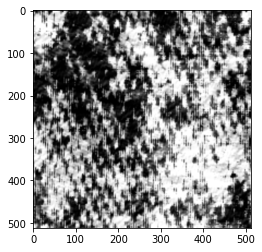

In [4]:
# laod the trained reference, if the reference is not available, 
# please run 'Reconstruction Using Learned References.ipynb' first
path = f'./output_abs/20200202_celeb_15_1_32_1_1_50_[0, 1]/u_celeb_32.npy'
u_celeb = np.load(path)
u_celeb =  resize(u_celeb, (1,512,512))
plt.imshow(u_celeb[0]);
plt.gray()
plt.show()

100%|██████████| 1/1 [00:00<00:00,  4.37it/s]


mse 0.00
psnr 25.64
ssim 0.86
mean mse 0.00
psnr of mean 26.44
psnr of mean (mean of psnr) 26.44(25.64)


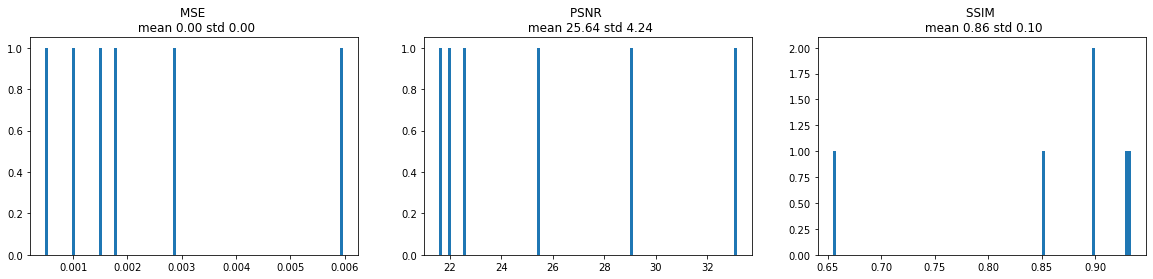

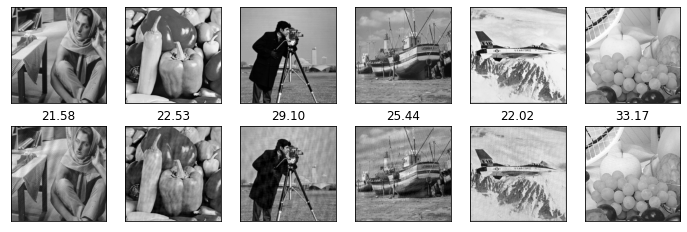

In [5]:
# use celeb reference for reconstruction
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u_celeb, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

## Using provided CelebA reference (for sanity)

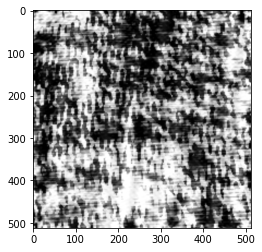

In [6]:
# use celeb reference for reconstruction
u_celeb_true = np.load('./trained_u/u_celeba.npy')
u_celeb_true = u_celeb_true[0]
u_celeb_true =  resize(u_celeb_true, (1,512,512))
plt.imshow(u_celeb_true[0]);

100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


mse 0.00
psnr 26.04
ssim 0.86
mean mse 0.00
psnr of mean 26.37
psnr of mean (mean of psnr) 26.37(26.04)


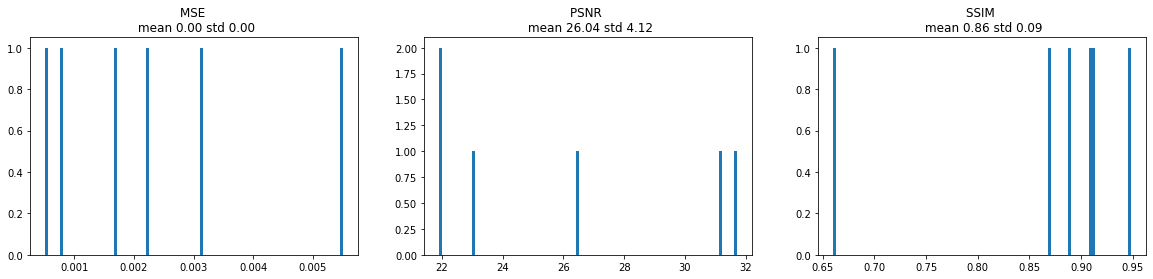

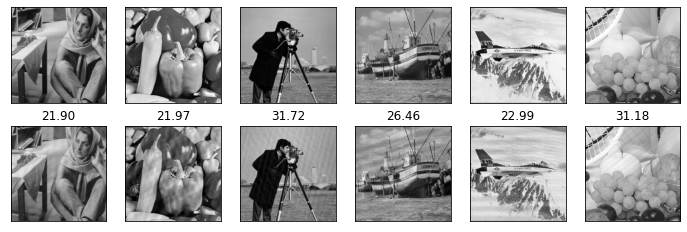

In [7]:
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u_celeb_true, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

# Use self-trained CIFAR10 reference

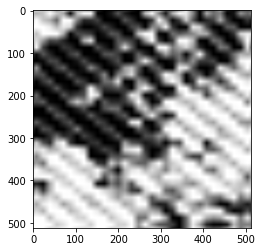

In [8]:
path = f'./output_abs/20200202_cifar_5_1_32_1.3_1_50_[0, 1]/u_cifar_32.npy'
u_cifar = np.load(path)
u_cifar=resize(u_cifar, (1,512,512))
plt.imshow(u_cifar[0]);
plt.gray()
plt.show()

100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


mse 0.01
psnr 21.06
ssim 0.62
mean mse 0.01
psnr of mean 21.84
psnr of mean (mean of psnr) 21.84(21.06)


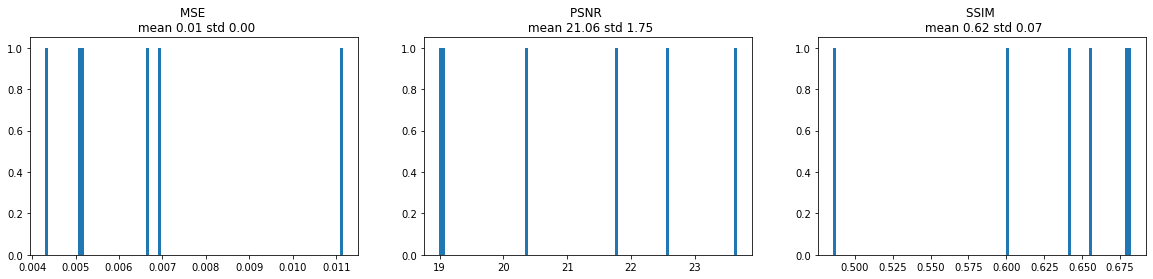

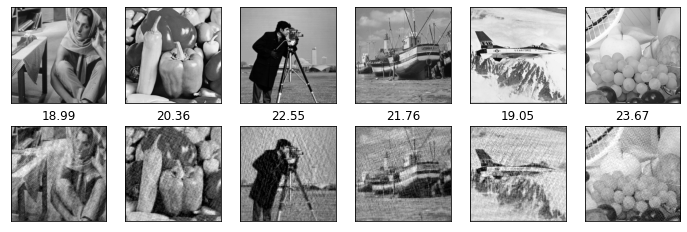

In [9]:
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u_cifar, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

## Use provided CIFAR10 reference (for sanity)

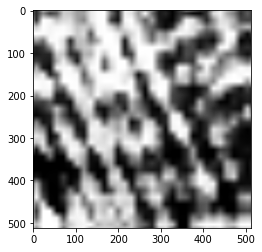

In [10]:
u_cifar_true = np.load('./trained_u/u_cifar.npy')
u_cifar_true = resize(u_cifar_true, (1,512,512))
plt.imshow(u_cifar_true[0]);
plt.gray()
plt.show()

100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


mse 0.01
psnr 20.70
ssim 0.62
mean mse 0.01
psnr of mean 21.65
psnr of mean (mean of psnr) 21.65(20.70)


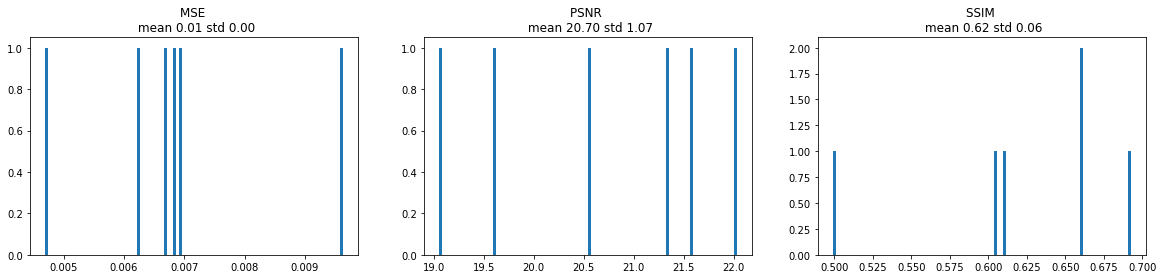

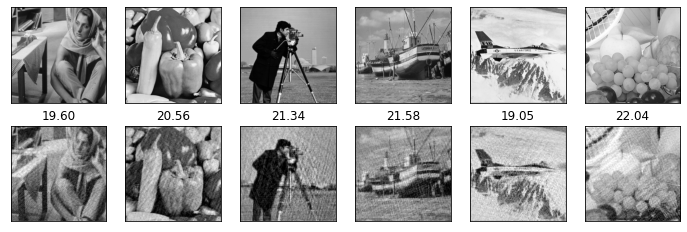

In [11]:
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u_cifar_true, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

# 2. Reconstructions with other types of references

## Use a random reference

In [12]:
# sample 100, 30x30 random references and save the reference, that performs the best on the standard images.

np.random.seed(417)
best_psnr = 0
u_best_sample = np.ones_like(u_celeb)

for i in range(0, 100):
    u_sample = np.random.rand(1,30,30)
    u_sample = resize(u_sample, (1, 512, 512))
    _, _, psnr_list_sample,_ = test_abs(6, 6, n_steps,alpha, u_sample, std_images)
    psnr = np.mean(psnr_list_sample)
    if psnr > best_psnr:
        u_best_sample = u_sample
        best_psnr = psnr

  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 14.85
ssim 0.54
mean mse 0.03
psnr of mean 15.08
psnr of mean (mean of psnr) 15.08(14.85)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.24
ssim 0.58
mean mse 0.02
psnr of mean 17.93
psnr of mean (mean of psnr) 17.93(18.24)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 17.90
ssim 0.58
mean mse 0.01
psnr of mean 18.47
psnr of mean (mean of psnr) 18.47(17.90)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.16
ssim 0.55
mean mse 0.03
psnr of mean 15.16
psnr of mean (mean of psnr) 15.16(15.16)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.75
ssim 0.56
mean mse 0.03
psnr of mean 15.07
psnr of mean (mean of psnr) 15.07(15.75)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.20
ssim 0.56
mean mse 0.02
psnr of mean 16.31
psnr of mean (mean of psnr) 16.31(16.20)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.58
ssim 0.57
mean mse 0.02
psnr of mean 16.95
psnr of mean (mean of psnr) 16.95(17.58)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.10
ssim 0.57
mean mse 0.02
psnr of mean 16.16
psnr of mean (mean of psnr) 16.16(16.10)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.06
ssim 0.59
mean mse 0.02
psnr of mean 17.96
psnr of mean (mean of psnr) 17.96(18.06)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.86
ssim 0.59
mean mse 0.01
psnr of mean 19.51
psnr of mean (mean of psnr) 19.51(18.86)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.78
ssim 0.58
mean mse 0.02
psnr of mean 17.69
psnr of mean (mean of psnr) 17.69(17.78)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.98
ssim 0.59
mean mse 0.02
psnr of mean 18.05
psnr of mean (mean of psnr) 18.05(17.98)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.67
ssim 0.55
mean mse 0.03
psnr of mean 15.12
psnr of mean (mean of psnr) 15.12(15.67)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.67
ssim 0.56
mean mse 0.02
psnr of mean 16.16
psnr of mean (mean of psnr) 16.16(16.67)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.26
ssim 0.56
mean mse 0.02
psnr of mean 16.26
psnr of mean (mean of psnr) 16.26(16.26)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.36
ssim 0.56
mean mse 0.03
psnr of mean 14.98
psnr of mean (mean of psnr) 14.98(15.36)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.86
ssim 0.56
mean mse 0.03
psnr of mean 15.21
psnr of mean (mean of psnr) 15.21(15.86)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.04
psnr 15.45
ssim 0.56
mean mse 0.04
psnr of mean 14.55
psnr of mean (mean of psnr) 14.55(15.45)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 14.50
ssim 0.54
mean mse 0.03
psnr of mean 14.70
psnr of mean (mean of psnr) 14.70(14.50)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.80
ssim 0.59
mean mse 0.02
psnr of mean 17.63
psnr of mean (mean of psnr) 17.63(17.80)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.57
ssim 0.57
mean mse 0.02
psnr of mean 16.79
psnr of mean (mean of psnr) 16.79(16.57)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.73
ssim 0.56
mean mse 0.02
psnr of mean 16.15
psnr of mean (mean of psnr) 16.15(16.73)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.24
ssim 0.56
mean mse 0.03
psnr of mean 15.48
psnr of mean (mean of psnr) 15.48(15.24)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.91
ssim 0.57
mean mse 0.02
psnr of mean 16.76
psnr of mean (mean of psnr) 16.76(17.91)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.45
ssim 0.59
mean mse 0.01
psnr of mean 18.35
psnr of mean (mean of psnr) 18.35(18.45)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.37
ssim 0.56
mean mse 0.02
psnr of mean 17.06
psnr of mean (mean of psnr) 17.06(17.37)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.54
ssim 0.57
mean mse 0.02
psnr of mean 16.50
psnr of mean (mean of psnr) 16.50(16.54)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.43
ssim 0.56
mean mse 0.02
psnr of mean 16.59
psnr of mean (mean of psnr) 16.59(16.43)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.64
ssim 0.58
mean mse 0.02
psnr of mean 16.48
psnr of mean (mean of psnr) 16.48(16.64)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.35
ssim 0.59
mean mse 0.01
psnr of mean 19.37
psnr of mean (mean of psnr) 19.37(19.35)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.28
ssim 0.55
mean mse 0.03
psnr of mean 15.11
psnr of mean (mean of psnr) 15.11(15.28)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.04
ssim 0.58
mean mse 0.02
psnr of mean 17.11
psnr of mean (mean of psnr) 17.11(17.04)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.67
ssim 0.58
mean mse 0.01
psnr of mean 18.47
psnr of mean (mean of psnr) 18.47(18.67)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.10
ssim 0.55
mean mse 0.03
psnr of mean 14.82
psnr of mean (mean of psnr) 14.82(15.10)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.28
ssim 0.59
mean mse 0.02
psnr of mean 18.11
psnr of mean (mean of psnr) 18.11(18.28)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.55
ssim 0.60
mean mse 0.01
psnr of mean 20.24
psnr of mean (mean of psnr) 20.24(19.55)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.39
ssim 0.57
mean mse 0.02
psnr of mean 16.69
psnr of mean (mean of psnr) 16.69(17.39)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.69
ssim 0.58
mean mse 0.02
psnr of mean 17.83
psnr of mean (mean of psnr) 17.83(17.69)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.64
ssim 0.59
mean mse 0.01
psnr of mean 19.24
psnr of mean (mean of psnr) 19.24(18.64)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.12
ssim 0.57
mean mse 0.02
psnr of mean 16.97
psnr of mean (mean of psnr) 16.97(17.12)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 16.23
ssim 0.56
mean mse 0.03
psnr of mean 15.29
psnr of mean (mean of psnr) 15.29(16.23)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.94
ssim 0.55
mean mse 0.03
psnr of mean 15.07
psnr of mean (mean of psnr) 15.07(15.94)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.88
ssim 0.57
mean mse 0.02
psnr of mean 16.86
psnr of mean (mean of psnr) 16.86(17.88)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.04
psnr 14.35
ssim 0.54
mean mse 0.04
psnr of mean 14.42
psnr of mean (mean of psnr) 14.42(14.35)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.91
ssim 0.58
mean mse 0.02
psnr of mean 17.39
psnr of mean (mean of psnr) 17.39(18.91)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.69
ssim 0.59
mean mse 0.01
psnr of mean 19.96
psnr of mean (mean of psnr) 19.96(19.69)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.04
psnr 14.86
ssim 0.54
mean mse 0.04
psnr of mean 14.46
psnr of mean (mean of psnr) 14.46(14.86)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.10
ssim 0.58
mean mse 0.02
psnr of mean 17.07
psnr of mean (mean of psnr) 17.07(17.10)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.89
ssim 0.57
mean mse 0.02
psnr of mean 16.57
psnr of mean (mean of psnr) 16.57(16.89)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.47
ssim 0.58
mean mse 0.01
psnr of mean 18.46
psnr of mean (mean of psnr) 18.46(18.47)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.71
ssim 0.58
mean mse 0.02
psnr of mean 17.49
psnr of mean (mean of psnr) 17.49(17.71)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 17.25
ssim 0.58
mean mse 0.03
psnr of mean 16.00
psnr of mean (mean of psnr) 16.00(17.25)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.96
ssim 0.57
mean mse 0.02
psnr of mean 16.81
psnr of mean (mean of psnr) 16.81(16.96)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.99
ssim 0.56
mean mse 0.03
psnr of mean 15.84
psnr of mean (mean of psnr) 15.84(15.99)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.34
ssim 0.59
mean mse 0.01
psnr of mean 18.79
psnr of mean (mean of psnr) 18.79(18.34)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.75
ssim 0.59
mean mse 0.01
psnr of mean 18.44
psnr of mean (mean of psnr) 18.44(18.75)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.69
ssim 0.57
mean mse 0.02
psnr of mean 16.88
psnr of mean (mean of psnr) 16.88(17.69)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.39
ssim 0.59
mean mse 0.01
psnr of mean 19.04
psnr of mean (mean of psnr) 19.04(19.39)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.21
ssim 0.58
mean mse 0.02
psnr of mean 18.21
psnr of mean (mean of psnr) 18.21(18.21)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.46
ssim 0.58
mean mse 0.02
psnr of mean 17.24
psnr of mean (mean of psnr) 17.24(17.46)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.68
ssim 0.57
mean mse 0.02
psnr of mean 16.76
psnr of mean (mean of psnr) 16.76(16.68)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.69
ssim 0.57
mean mse 0.02
psnr of mean 16.22
psnr of mean (mean of psnr) 16.22(16.69)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.63
ssim 0.58
mean mse 0.02
psnr of mean 16.58
psnr of mean (mean of psnr) 16.58(16.63)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.28
ssim 0.56
mean mse 0.02
psnr of mean 16.17
psnr of mean (mean of psnr) 16.17(16.28)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.94
ssim 0.59
mean mse 0.02
psnr of mean 17.90
psnr of mean (mean of psnr) 17.90(17.94)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.19
ssim 0.59
mean mse 0.01
psnr of mean 18.49
psnr of mean (mean of psnr) 18.49(18.19)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.07
ssim 0.60
mean mse 0.01
psnr of mean 19.59
psnr of mean (mean of psnr) 19.59(19.07)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.06
ssim 0.58
mean mse 0.02
psnr of mean 17.64
psnr of mean (mean of psnr) 17.64(18.06)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.54
ssim 0.58
mean mse 0.02
psnr of mean 16.69
psnr of mean (mean of psnr) 16.69(16.54)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.11
ssim 0.56
mean mse 0.03
psnr of mean 14.57
psnr of mean (mean of psnr) 14.57(15.11)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.00
ssim 0.55
mean mse 0.03
psnr of mean 15.23
psnr of mean (mean of psnr) 15.23(15.00)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 16.09
ssim 0.55
mean mse 0.03
psnr of mean 15.52
psnr of mean (mean of psnr) 15.52(16.09)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.32
ssim 0.58
mean mse 0.02
psnr of mean 17.94
psnr of mean (mean of psnr) 17.94(18.32)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.64
ssim 0.61
mean mse 0.01
psnr of mean 20.03
psnr of mean (mean of psnr) 20.03(19.64)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 18.51
ssim 0.59
mean mse 0.01
psnr of mean 18.70
psnr of mean (mean of psnr) 18.70(18.51)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.17
ssim 0.56
mean mse 0.02
psnr of mean 16.21
psnr of mean (mean of psnr) 16.21(16.17)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.54
ssim 0.58
mean mse 0.02
psnr of mean 17.39
psnr of mean (mean of psnr) 17.39(17.54)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.49
ssim 0.56
mean mse 0.03
psnr of mean 14.66
psnr of mean (mean of psnr) 14.66(15.49)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 14.85
ssim 0.55
mean mse 0.03
psnr of mean 15.01
psnr of mean (mean of psnr) 15.01(14.85)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.66
ssim 0.59
mean mse 0.02
psnr of mean 17.79
psnr of mean (mean of psnr) 17.79(17.66)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.39
ssim 0.55
mean mse 0.03
psnr of mean 15.49
psnr of mean (mean of psnr) 15.49(15.39)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.18
ssim 0.57
mean mse 0.02
psnr of mean 17.19
psnr of mean (mean of psnr) 17.19(17.18)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.02
ssim 0.57
mean mse 0.02
psnr of mean 16.45
psnr of mean (mean of psnr) 16.45(17.02)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.94
ssim 0.57
mean mse 0.03
psnr of mean 15.96
psnr of mean (mean of psnr) 15.96(15.94)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 16.02
ssim 0.56
mean mse 0.03
psnr of mean 15.81
psnr of mean (mean of psnr) 15.81(16.02)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.86
ssim 0.57
mean mse 0.02
psnr of mean 16.66
psnr of mean (mean of psnr) 16.66(16.86)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.54
ssim 0.58
mean mse 0.02
psnr of mean 16.78
psnr of mean (mean of psnr) 16.78(16.54)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.55
ssim 0.55
mean mse 0.03
psnr of mean 15.66
psnr of mean (mean of psnr) 15.66(15.55)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 16.29
ssim 0.57
mean mse 0.03
psnr of mean 15.96
psnr of mean (mean of psnr) 15.96(16.29)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.80
ssim 0.61
mean mse 0.01
psnr of mean 20.43
psnr of mean (mean of psnr) 20.43(19.80)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 16.65
ssim 0.58
mean mse 0.02
psnr of mean 17.07
psnr of mean (mean of psnr) 17.07(16.65)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 15.93
ssim 0.56
mean mse 0.03
psnr of mean 15.61
psnr of mean (mean of psnr) 15.61(15.93)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.13
ssim 0.61
mean mse 0.01
psnr of mean 19.81
psnr of mean (mean of psnr) 19.81(19.13)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.52
ssim 0.58
mean mse 0.02
psnr of mean 17.06
psnr of mean (mean of psnr) 17.06(17.52)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.61
ssim 0.59
mean mse 0.02
psnr of mean 17.36
psnr of mean (mean of psnr) 17.36(18.61)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 17.07
ssim 0.58
mean mse 0.02
psnr of mean 16.94
psnr of mean (mean of psnr) 16.94(17.07)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.03
psnr 17.41
ssim 0.57
mean mse 0.03
psnr of mean 15.78
psnr of mean (mean of psnr) 15.78(17.41)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.01
psnr 19.16
ssim 0.59
mean mse 0.01
psnr of mean 19.46
psnr of mean (mean of psnr) 19.46(19.16)


  0%|          | 0/1 [00:00<?, ?it/s]

mse 0.02
psnr 18.79
ssim 0.58
mean mse 0.02
psnr of mean 17.15
psnr of mean (mean of psnr) 17.15(18.79)


100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

mse 0.02
psnr 16.95
ssim 0.58
mean mse 0.02
psnr of mean 16.69
psnr of mean (mean of psnr) 16.69(16.95)


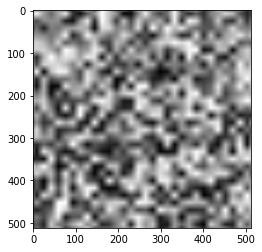

In [13]:
# take a look at the random reference
plt.imshow(u_best_sample[0]);

100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


mse 0.01
psnr 19.80
ssim 0.61
mean mse 0.01
psnr of mean 20.43
psnr of mean (mean of psnr) 20.43(19.80)


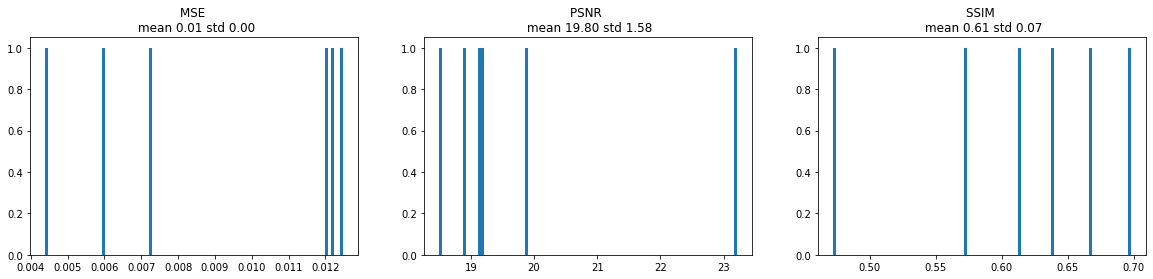

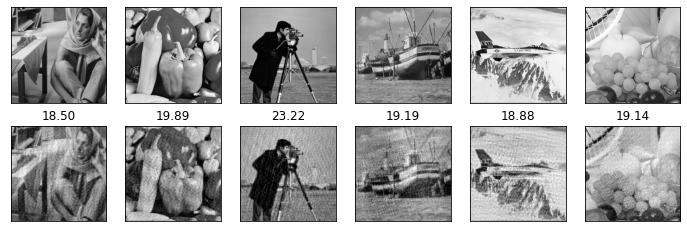

In [14]:
# reconstruct with random reference
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps,alpha, u_best_sample, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

# Use a flat reference

In [15]:
u_flat1 = np.ones_like(u_celeb)
u_flat0 = np.zeros_like(u_celeb) # like no reference at all.
u_flat_quarter = u_flat0 + 0.25
u_flat_half = u_flat0 + 0.5

flat_us = [u_flat0, u_flat1, u_flat_quarter, u_flat_half]

100%|██████████| 1/1 [00:00<00:00,  4.65it/s]


mse 0.06
psnr 12.48
ssim 0.39
mean mse 0.06
psnr of mean 12.59
psnr of mean (mean of psnr) 12.59(12.48)


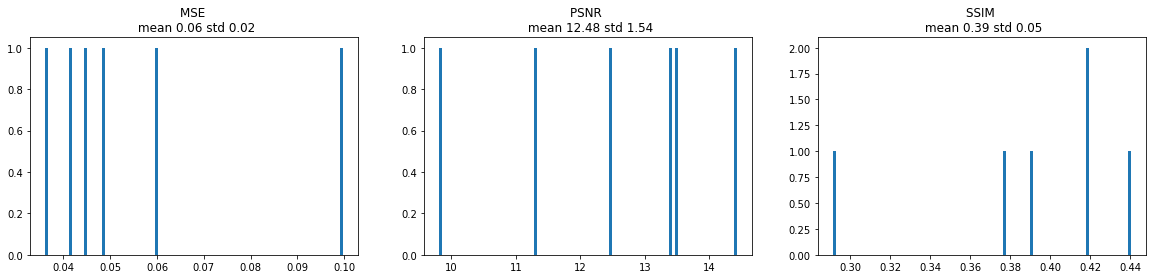

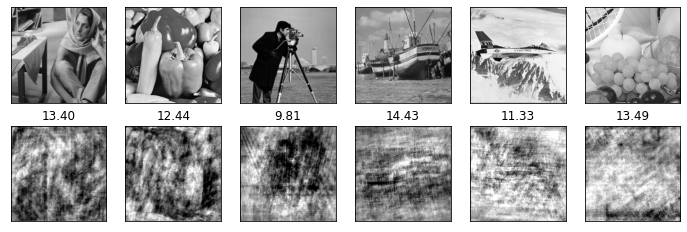

100%|██████████| 1/1 [00:00<00:00,  4.51it/s]


mse 0.05
psnr 12.91
ssim 0.47
mean mse 0.05
psnr of mean 13.00
psnr of mean (mean of psnr) 13.00(12.91)


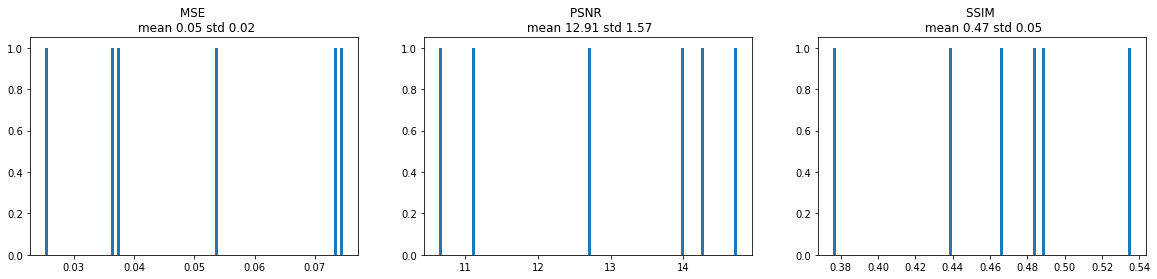

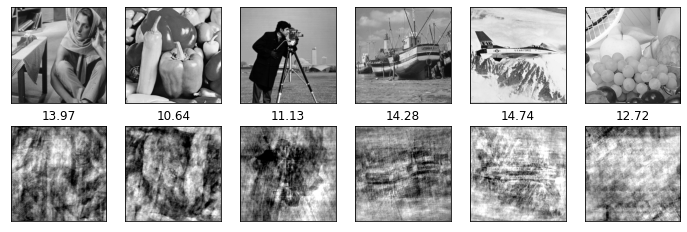

100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


mse 0.04
psnr 14.01
ssim 0.45
mean mse 0.04
psnr of mean 14.22
psnr of mean (mean of psnr) 14.22(14.01)


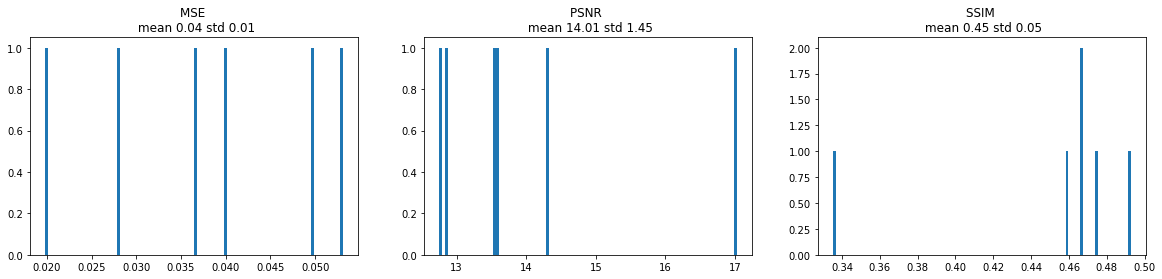

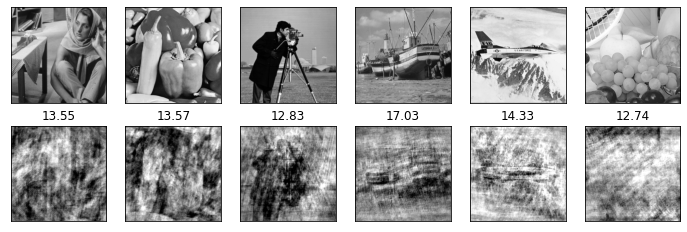

100%|██████████| 1/1 [00:00<00:00,  4.68it/s]


mse 0.05
psnr 13.45
ssim 0.45
mean mse 0.05
psnr of mean 13.43
psnr of mean (mean of psnr) 13.43(13.45)


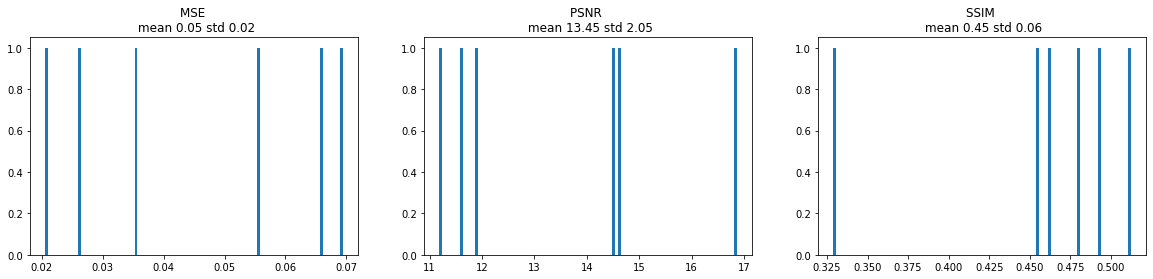

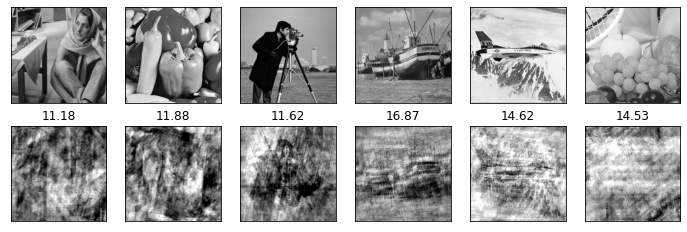

In [16]:
# use flat references

for u in flat_us:
    x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u, std_images)

    plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

# Use handcrafted reference

In [17]:
u_block = np.ones_like(u_celeb)
u_block[0,112:413,112:413] = 0

u_stripes = np.ones_like(u_celeb)
idx = range(0,512,3)
u_stripes[0,idx] = 0

u_cross = np.ones_like(u_celeb)
idx = np.arange(108, 200, 1) 
u_cross[0,idx] = 0
u_cross[0,:,idx] = 0

hand_us= [u_block, u_stripes, u_cross]

100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


mse 0.02
psnr 16.66
ssim 0.57
mean mse 0.02
psnr of mean 16.48
psnr of mean (mean of psnr) 16.48(16.66)


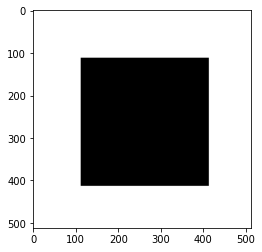

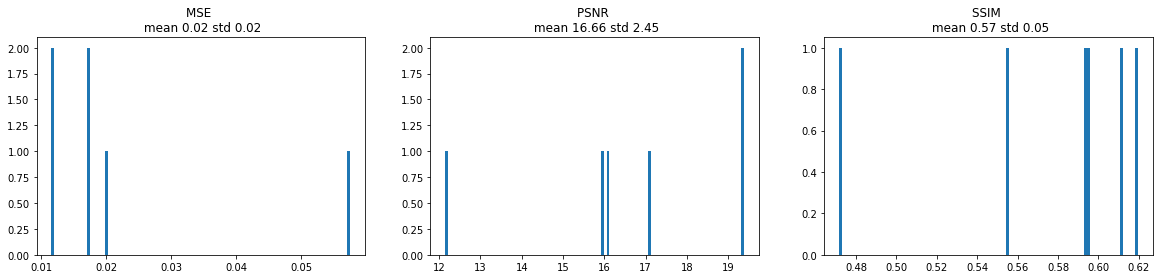

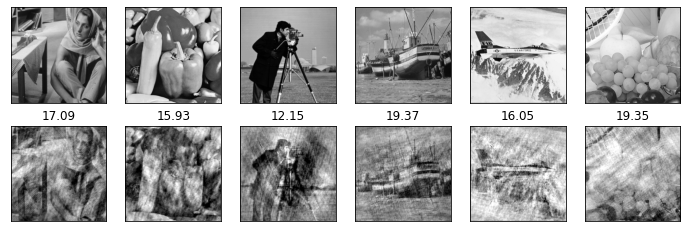

100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


mse 0.04
psnr 13.99
ssim 0.47
mean mse 0.04
psnr of mean 13.85
psnr of mean (mean of psnr) 13.85(13.99)


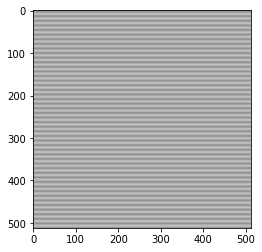

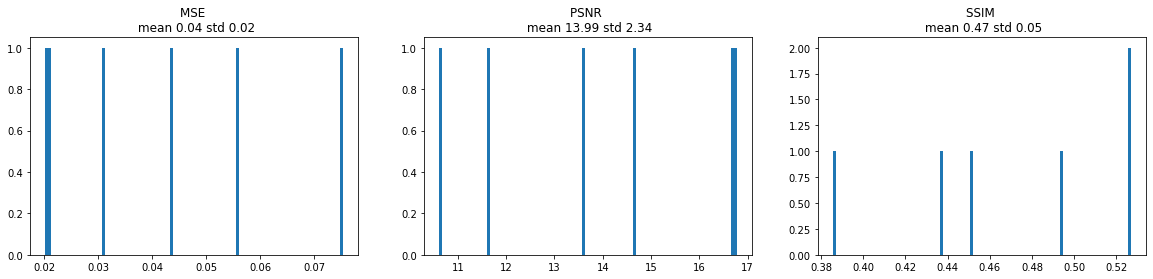

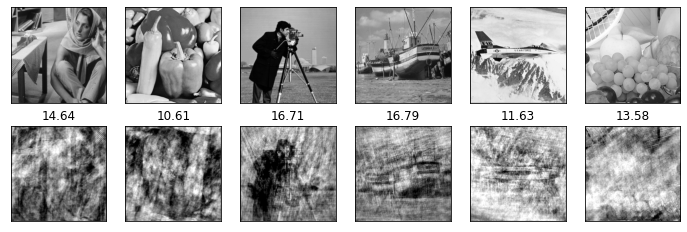

100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


mse 0.01
psnr 20.95
ssim 0.66
mean mse 0.01
psnr of mean 21.59
psnr of mean (mean of psnr) 21.59(20.95)


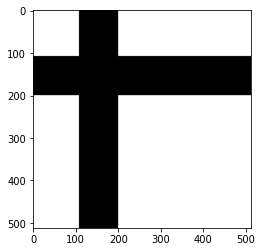

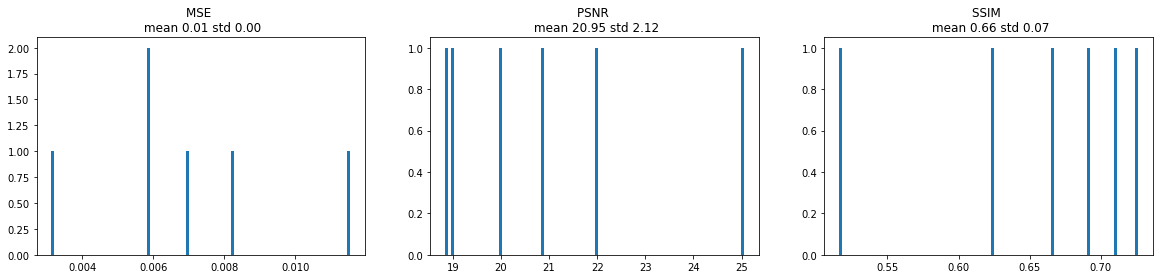

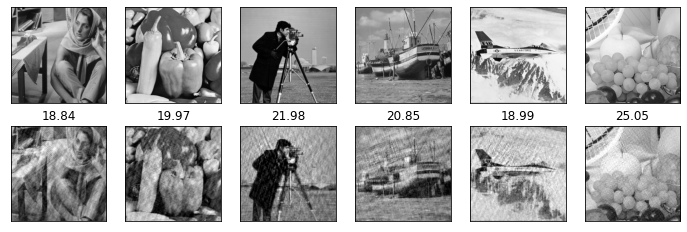

In [18]:
# use handcrafted references

for u in hand_us:
    plt.imshow(u[0]);
    x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps, alpha, u, std_images)

    plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)

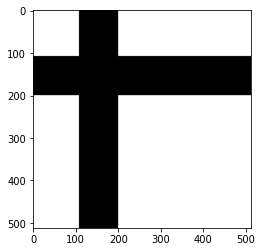

100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


mse 0.01
psnr 20.95
ssim 0.66
mean mse 0.01
psnr of mean 21.59
psnr of mean (mean of psnr) 21.59(20.95)


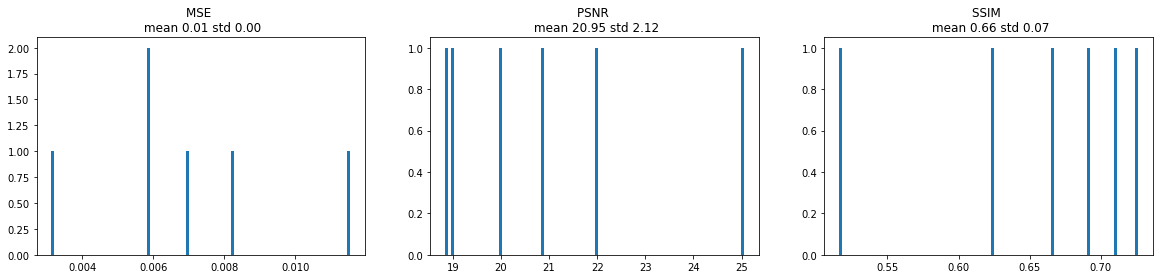

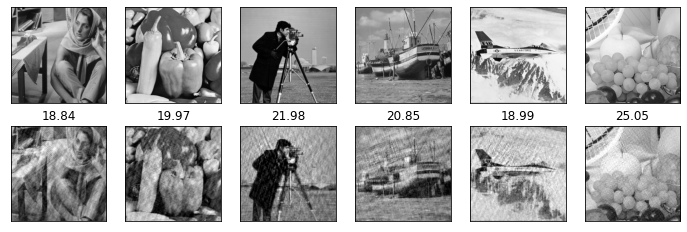

In [19]:
plt.imshow(u_cross[0]);
plt.show()
x_rec_std, mse_list_std, psnr_list_std, ssim_list_std= test_abs(6, 6, n_steps,alpha, u_cross, std_images)

plot_test(x_rec_std,
          std_images,
          mse_list_std,
          psnr_list_std,
          ssim_list_std,
          6,
          plot_n = 6)